# Nancy osama ibrahim
## dataset: Customer Personality analysis
### link: https://www.kaggle.com/sveneschlbeck/customer-personality-eda/data

In [178]:
#import tthe libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
from sklearn.model_selection import train_test_split
from datasist.structdata import detect_outliers

In [179]:
#read the file
df=pd.read_csv('marketing_campaign.csv',sep='\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


## check if there is a null value

In [180]:
#check if there is a null value
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [181]:
df['Education'].isnull().sum()

0

In [182]:
df['Marital_Status'].isnull().sum()

0

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [184]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


# 1) fill the missing data

In [185]:
df['Income'].fillna(df['Income'].median(),inplace=True)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [186]:
df['Dt_Customer']

0       04-09-2012
1       08-03-2014
2       21-08-2013
3       10-02-2014
4       19-01-2014
           ...    
2235    13-06-2013
2236    10-06-2014
2237    25-01-2014
2238    24-01-2014
2239    15-10-2012
Name: Dt_Customer, Length: 2240, dtype: object

In [187]:
df['AcceptedCmp1']

0       0
1       0
2       0
3       0
4       0
       ..
2235    0
2236    1
2237    0
2238    0
2239    0
Name: AcceptedCmp1, Length: 2240, dtype: int64

#  2) Data visualization

In [188]:
#see the values of education column
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [189]:
#see the values of Marital_Status column
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [300]:
df['ID'].head(245)

0      5524
1      2174
2      4141
3      6182
4      5324
       ... 
243    9529
244    6439
245    7411
246    2176
247    9265
Name: ID, Length: 245, dtype: int64

(array([224., 213., 232., 235., 243., 221., 212., 198., 206., 256.]),
 array([    0. ,  1119.1,  2238.2,  3357.3,  4476.4,  5595.5,  6714.6,
         7833.7,  8952.8, 10071.9, 11191. ]),
 <a list of 10 Patch objects>)

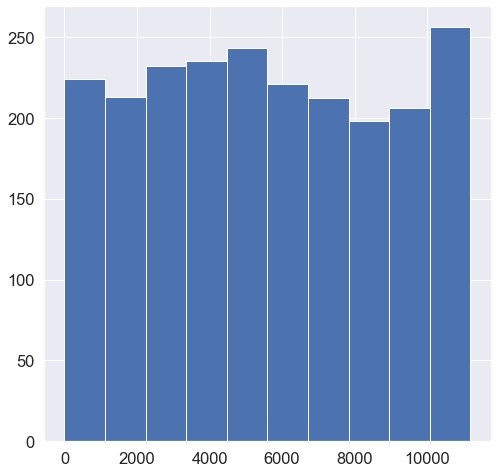

In [190]:
#see the histogram of ID column
sns.set(rc={'figure.figsize': [8, 8]}, font_scale=1.5)
plt.hist(df['ID'])

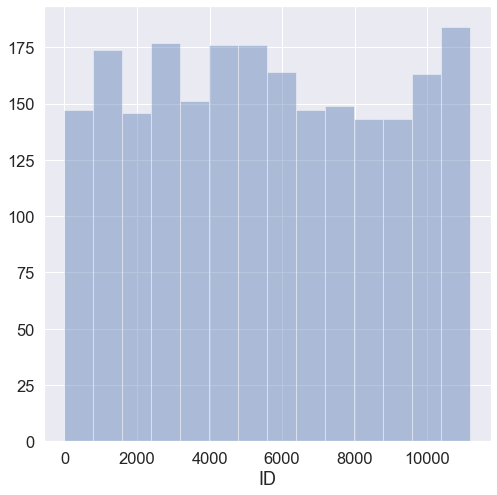

In [191]:
sns.set(rc={'figure.figsize': [8, 8]}, font_scale=1.5)
sns.distplot(df['ID'],kde=False)

In [297]:
df['ID'].duplicated().sum()

0

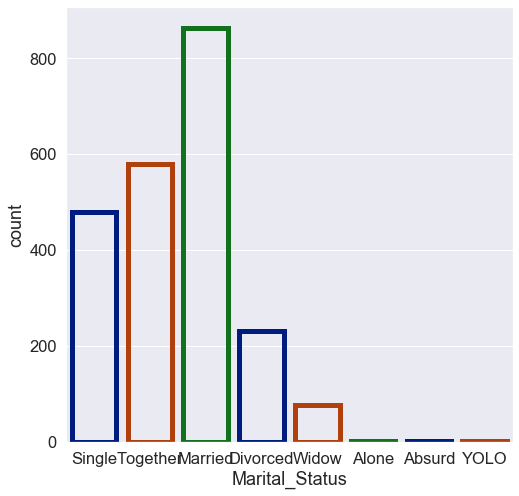

In [192]:
#Marital_Status column
sns.countplot(x='Marital_Status',data=df,facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark", 3))

(array([480., 580., 864.,   0., 232.,  77.,   0.,   3.,   2.,   2.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

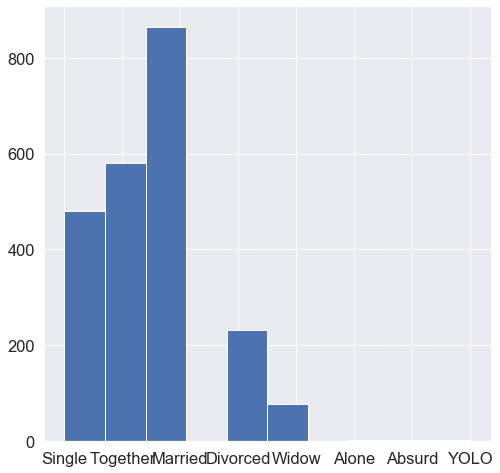

In [193]:
#Marital_Status column
plt.hist(df['Marital_Status'])

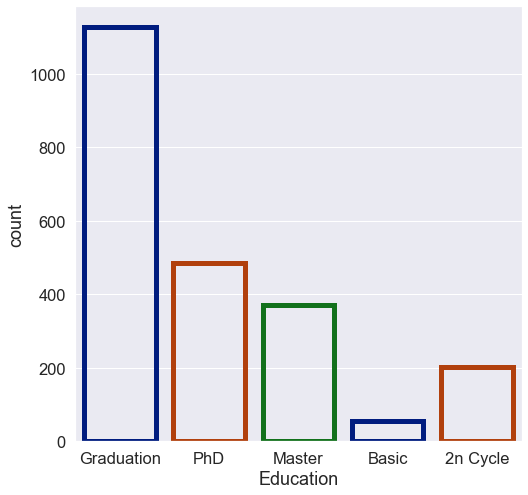

In [194]:
#eduaction column
sns.countplot(x='Education',data=df,facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark", 3))

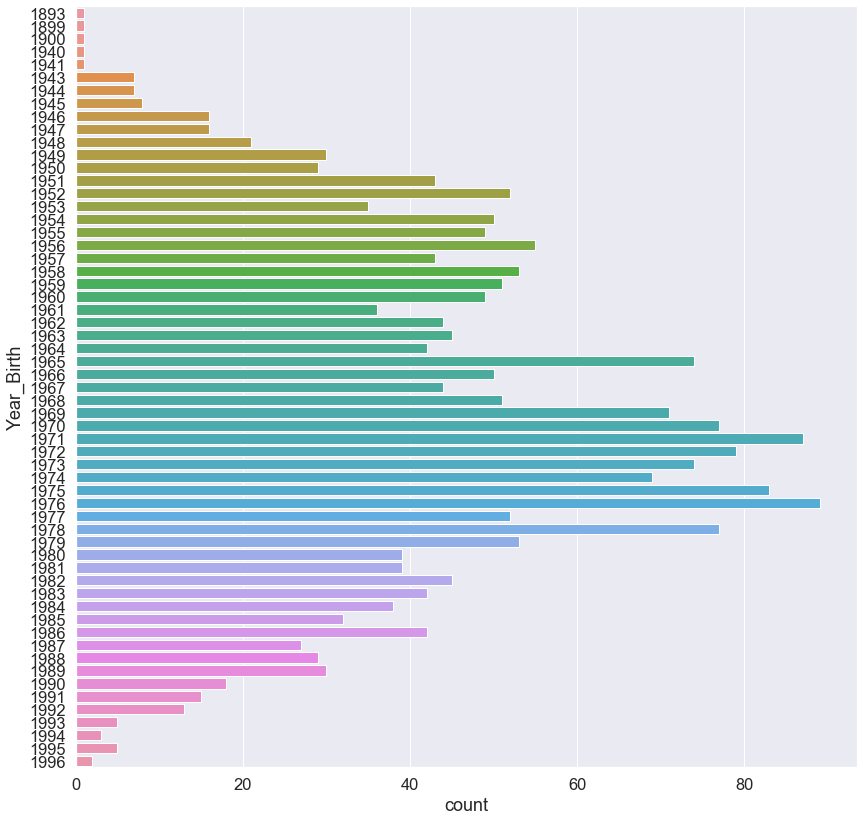

In [195]:
#Year_Birth column
sns.set(rc={'figure.figsize': [14, 14]}, font_scale=1.5)
sns.countplot(y='Year_Birth',data=df)

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

(array([ 24., 155., 284., 278., 332., 469., 349., 226., 110.,  10.]),
 array([1940., 1946., 1952., 1958., 1964., 1970., 1976., 1982., 1988.,
        1994., 2000.]),
 <a list of 10 Patch objects>)

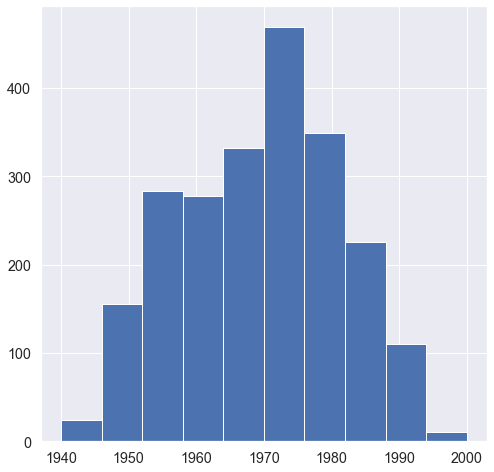

In [197]:
sns.set(rc={'figure.figsize': [8, 8]}, font_scale=1.3)
plt.hist(df['Year_Birth'],range=[1940,2000])

In [302]:
df['Year_Birth'].duplicated().sum()

2173

(array([ 1.,  1.,  1.,  3.,  2.,  2., 13.,  3.,  3.,  4.]),
 array([ 1000.,  2000.,  3000.,  4000.,  5000.,  6000.,  7000.,  8000.,
         9000., 10000., 11000.]),
 <a list of 10 Patch objects>)

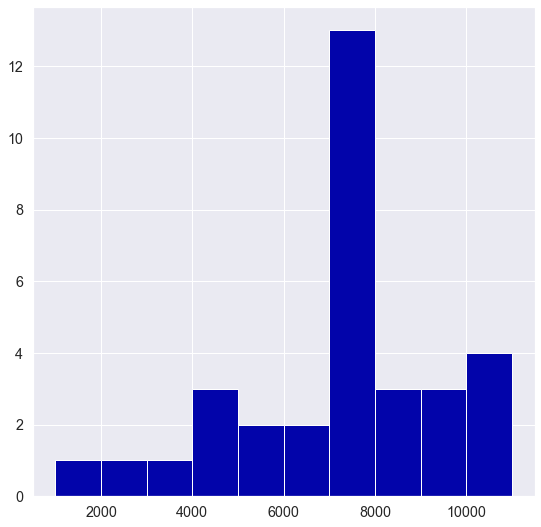

In [198]:
#income column
sns.set(rc={'figure.figsize': [9, 9]}, font_scale=1.3)
plt.hist(df['Income'],range=[1000,11000],color='#0204aa')

In [199]:
df['Teenhome'].unique()

array([0, 1, 2], dtype=int64)

# 3) work with data & visualization

In [200]:
#change some data
df['Marital_Status']=df['Marital_Status'].replace({'Divorced':'Alone','Single':'Alone','Married':'In couple','Together':'In couple','Absurd':'Alone','Widow':'Alone','YOLO':'Alone'})
df['Education']=df['Education'].replace({'Basic':'Undergraduate','2n Cycle':'Undergraduate','Graduation':'Postgraduate','Master':'Postgraduate','PhD':'Postgraduate'})

In [201]:
#change the name of some columns
df= df.rename(columns={'MntMeatProducts': 'amount_of_meat_products','MntFishProducts': 'amount_of_fish_products','MntSweetProducts': 'amount_of_sweet_products','MntGoldProds': 'amount_of_gold_products'})

In [202]:
#change the name of some columns
df= df.rename(columns={'Recency': 'No_days_since_customers_last_purchase','Dt_Customer': 'Date_of_enrollment_with_company','MntWines': 'amount_of_wine','MntFruits': 'amount_of_fruits'})

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ID                                     2240 non-null   int64  
 1   Year_Birth                             2240 non-null   int64  
 2   Education                              2240 non-null   object 
 3   Marital_Status                         2240 non-null   object 
 4   Income                                 2240 non-null   float64
 5   Kidhome                                2240 non-null   int64  
 6   Teenhome                               2240 non-null   int64  
 7   Date_of_enrollment_with_company        2240 non-null   object 
 8   No_days_since_customers_last_purchase  2240 non-null   int64  
 9   amount_of_wine                         2240 non-null   int64  
 10  amount_of_fruits                       2240 non-null   int64  
 11  amou

In [204]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Date_of_enrollment_with_company,No_days_since_customers_last_purchase,amount_of_wine,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Postgraduate,Alone,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Postgraduate,Alone,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Postgraduate,In couple,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Postgraduate,In couple,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,Postgraduate,In couple,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Postgraduate,In couple,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,Postgraduate,In couple,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Postgraduate,Alone,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Postgraduate,In couple,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [205]:
#change the data
conv_edu={'Postgraduate':1,'Undergraduate':0}
conv_marital={'In couple':1,'Alone':0}
df['Education']=df['Education'].map(conv_edu)
df['Marital_Status']=df['Marital_Status'].map(conv_marital)

In [206]:
#add a new column which sums up amount of all products
df['amount_all_products']=df['amount_of_fruits']+df['amount_of_gold_products']+df['amount_of_sweet_products']+df['amount_of_fruits']+df['amount_of_fish_products']+df['amount_of_wine']

In [207]:
#add a new column
df['Children']=df['Kidhome']+df['Teenhome']
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Date_of_enrollment_with_company,No_days_since_customers_last_purchase,amount_of_wine,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,amount_all_products,Children
0,5524,1957,1,0,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,1159,0
1,2174,1954,1,0,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,22,2
2,4141,1965,1,1,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,698,0
3,6182,1984,1,1,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,3,11,0,37,1
4,5324,1981,1,1,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,3,11,0,347,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,1,1,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,3,11,0,1202,1
2236,4001,1946,1,1,64014.0,2,1,10-06-2014,56,406,...,0,0,1,0,0,3,11,0,414,3
2237,7270,1981,1,0,56981.0,0,0,25-01-2014,91,908,...,1,0,0,0,0,3,11,0,1072,0
2238,8235,1956,1,1,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,3,11,0,659,1


In [208]:
#check the similarity between two columns
counter=0
count=0
for i in range(2240):
    if df['AcceptedCmp3'][i]==df['AcceptedCmp5'][i]:
        counter+=1
        print(counter)
    else:    
        count+=1
        print(count)
#(df['AcceptedCmp3']==0).sum()

1
2
3
4
5
6
7
8
9
1
10
11
12
13
14
2
15
16
17
18
19
20
21
22
23
24
25
26
27
3
28
29
30
31
32
33
34
35
36
4
37
38
39
40
41
42
43
44
45
46
47
48
49
5
50
6
51
52
53
54
7
55
56
57
58
59
60
8
61
62
63
64
65
66
67
68
69
9
70
10
71
72
73
74
75
76
77
78
11
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
12
103
104
13
105
106
107
108
109
110
111
14
112
113
114
115
116
117
118
119
120
121
122
123
124
15
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
16
141
142
143
144
145
146
147
148
149
150
17
151
152
153
154
155
156
157
18
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
19
173
174
175
176
177
178
20
179
21
180
181
182
22
183
23
24
184
185
25
186
187
188
189
190
191
192
26
193
194
195
196
197
198
199
200
201
202
203
204
205
27
206
207
208
209
210
211
212
213
214
215
216
217
218
219
28
220
221
222
223
224
29
225
226
227
228
229
230
231
30
232
233
234
235
236
31
32
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
2

1730
240
241
242
1731
1732
1733
1734
1735
1736
1737
243
1738
1739
244
1740
1741
1742
1743
1744
1745
1746
1747
1748
245
246
1749
1750
1751
1752
247
1753
1754
1755
1756
1757
1758
1759
1760
248
1761
1762
1763
1764
249
1765
1766
1767
1768
1769
1770
1771
1772
1773
1774
1775
1776
1777
1778
1779
250
1780
251
1781
1782
1783
252
1784
1785
1786
1787
253
1788
1789
1790
1791
1792
1793
1794
254
1795
1796
1797
1798
1799
1800
1801
1802
1803
1804
1805
1806
1807
1808
1809
1810
1811
1812
1813
1814
1815
1816
1817
1818
1819
1820
1821
1822
1823
1824
1825
1826
1827
1828
1829
1830
255
1831
1832
1833
1834
1835
1836
1837
1838
256
257
1839
1840
1841
1842
1843
1844
1845
1846
258
1847
1848
1849
259
1850
260
1851
261
1852
1853
1854
1855
1856
1857
1858
1859
1860
1861
1862
1863
1864
262
1865
263
1866
1867
1868
1869
1870
1871
1872
1873
264
1874
1875
1876
1877
1878
1879
1880
265
266
1881
1882
1883
1884
1885
1886
1887
267
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
268
1905
1906

In [209]:
#check the similarity between two columns
counter=0
count=0
for i in range(2240):
    if df['AcceptedCmp3'][i]==df['AcceptedCmp2'][i]:
        counter+=1
        print(counter)
    else:    
        count+=1
        print(count)

1
2
3
4
5
6
7
8
9
1
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
2
39
40
41
42
43
44
45
46
47
48
49
50
51
3
52
53
54
55
56
57
58
59
60
61
62
63
64
4
65
66
67
68
69
70
71
72
73
5
74
6
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
7
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
8
160
161
162
163
164
165
166
9
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
10
182
183
184
185
186
187
188
189
11
190
191
192
193
194
12
13
195
196
14
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
15
239
240
241
242
243
244
245
16
246
247
248
249
250
17
18
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266

2042
2043
2044
2045
2046
2047
178
2048
2049
2050
2051
2052
179
2053
2054
2055
2056
2057
2058
2059
2060
2061


In [210]:
#check the similarity between two columns
counter=0
count=0
for i in range(2240):
    if df['AcceptedCmp5'][i]==df['AcceptedCmp2'][i]:
        counter+=1
        print(counter)
    else:    
        count+=1
        print(count)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
1
16
17
18
19
20
21
22
23
24
25
26
27
28
2
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
3
54
55
56
57
4
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
5
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
6
109
110
7
111
112
113
114
115
116
117
8
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
9
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
10
189
190
191
192
193
11
194
195
196
197
198
199
200
201
202
203
204
205
206
12
207
208
209
210
211
212
213
214
215
216
217
218
219
13
220
221
222
223
224
225
226
227
228
229
230
231
232
233
14
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269

1842
141
1843
1844
1845
1846
1847
1848
1849
1850
1851
142
143
1852
144
1853
1854
1855
1856
1857
1858
1859
1860
1861
1862
1863
1864
1865
1866
1867
1868
145
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
146
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
147
1939
1940
1941
1942
1943
1944
1945
1946
148
1947
1948
1949
1950
149
150
1951
1952
1953
151
1954
1955
1956
1957
1958
152
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
153
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
154
155
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
156
2014
2015
2016
2017
2018
2019
157
2020
2021
2022
2023
2024
2025
2026
2027
20

In [211]:
#drop unnecessary columns
df.drop('AcceptedCmp3',axis=1,inplace=True)
df.drop('AcceptedCmp4',axis=1,inplace=True)
df.drop('AcceptedCmp5',axis=1,inplace=True)
df.drop('AcceptedCmp1',axis=1,inplace=True)
df.drop('AcceptedCmp2',axis=1,inplace=True)

In [212]:
def has_children(x):
    if x>0:
        return 1
    else:
        return 0

In [213]:
#add new column that checks if the customer has children or not
df['has_children']=df['Children'].apply(has_children)

In [214]:
df['Z_CostContact'].unique()

array([3], dtype=int64)

In [215]:
df['Z_Revenue'].unique()

array([11], dtype=int64)

In [216]:
df.drop('Z_Revenue',axis=1,inplace=True)

In [217]:
df.drop('Z_CostContact',axis=1,inplace=True)

In [218]:
df['Complain'].unique()

array([0, 1], dtype=int64)

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ID                                     2240 non-null   int64  
 1   Year_Birth                             2240 non-null   int64  
 2   Education                              2240 non-null   int64  
 3   Marital_Status                         2240 non-null   int64  
 4   Income                                 2240 non-null   float64
 5   Kidhome                                2240 non-null   int64  
 6   Teenhome                               2240 non-null   int64  
 7   Date_of_enrollment_with_company        2240 non-null   object 
 8   No_days_since_customers_last_purchase  2240 non-null   int64  
 9   amount_of_wine                         2240 non-null   int64  
 10  amount_of_fruits                       2240 non-null   int64  
 11  amou

In [220]:
#change the datatype of a column
df['Date_of_enrollment_with_company']=pd.to_datetime(df['Date_of_enrollment_with_company'])
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Date_of_enrollment_with_company,No_days_since_customers_last_purchase,amount_of_wine,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,amount_all_products,Children,has_children
0,5524,1957,1,0,58138.0,0,0,2012-04-09,58,635,...,3,8,10,4,7,0,1,1159,0,0
1,2174,1954,1,0,46344.0,1,1,2014-08-03,38,11,...,2,1,1,2,5,0,0,22,2,1
2,4141,1965,1,1,71613.0,0,0,2013-08-21,26,426,...,1,8,2,10,4,0,0,698,0,0
3,6182,1984,1,1,26646.0,1,0,2014-10-02,26,11,...,2,2,0,4,6,0,0,37,1,1
4,5324,1981,1,1,58293.0,1,0,2014-01-19,94,173,...,5,5,3,6,5,0,0,347,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,1,1,61223.0,0,1,2013-06-13,46,709,...,2,9,3,4,5,0,0,1202,1,1
2236,4001,1946,1,1,64014.0,2,1,2014-10-06,56,406,...,7,8,2,5,7,0,0,414,3,1
2237,7270,1981,1,0,56981.0,0,0,2014-01-25,91,908,...,1,2,3,13,6,0,0,1072,0,0
2238,8235,1956,1,1,69245.0,0,1,2014-01-24,8,428,...,2,6,5,10,3,0,0,659,1,1


### visualize some columns

(array([164., 407., 499., 733., 425.,   3.,   1.,   2.,   1.,   5.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <a list of 10 Patch objects>)

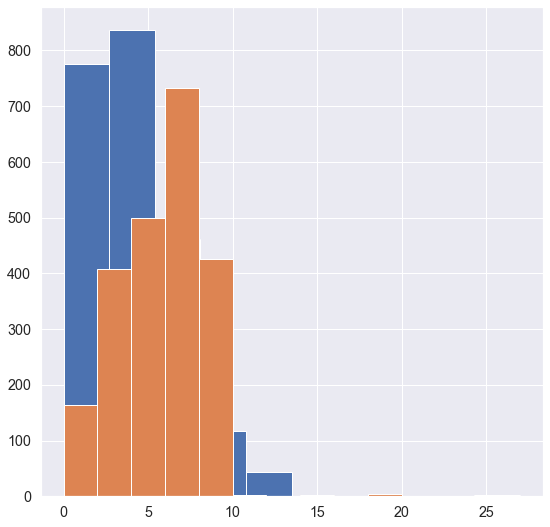

In [221]:
#relation between two columns
plt.hist(df['NumWebPurchases'])
plt.hist(df['NumWebVisitsMonth'])

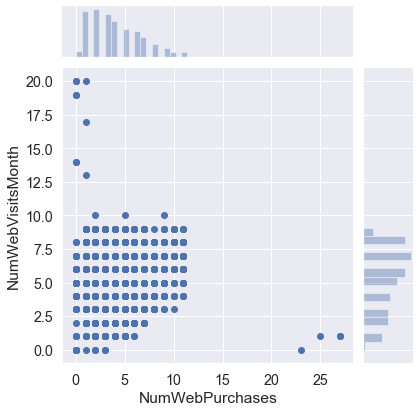

In [222]:
#relation between two columns
sns.jointplot(x='NumWebPurchases',y='NumWebVisitsMonth',kind='scatter',data=df)

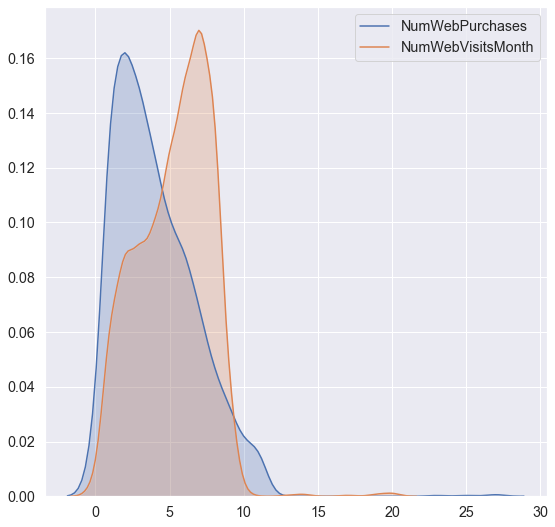

In [223]:
#relation between NumWebPurchases and NumWebVisitsMonth
sns.kdeplot(df['NumWebPurchases'],shade=True)
sns.kdeplot(df['NumWebVisitsMonth'],shade=True)

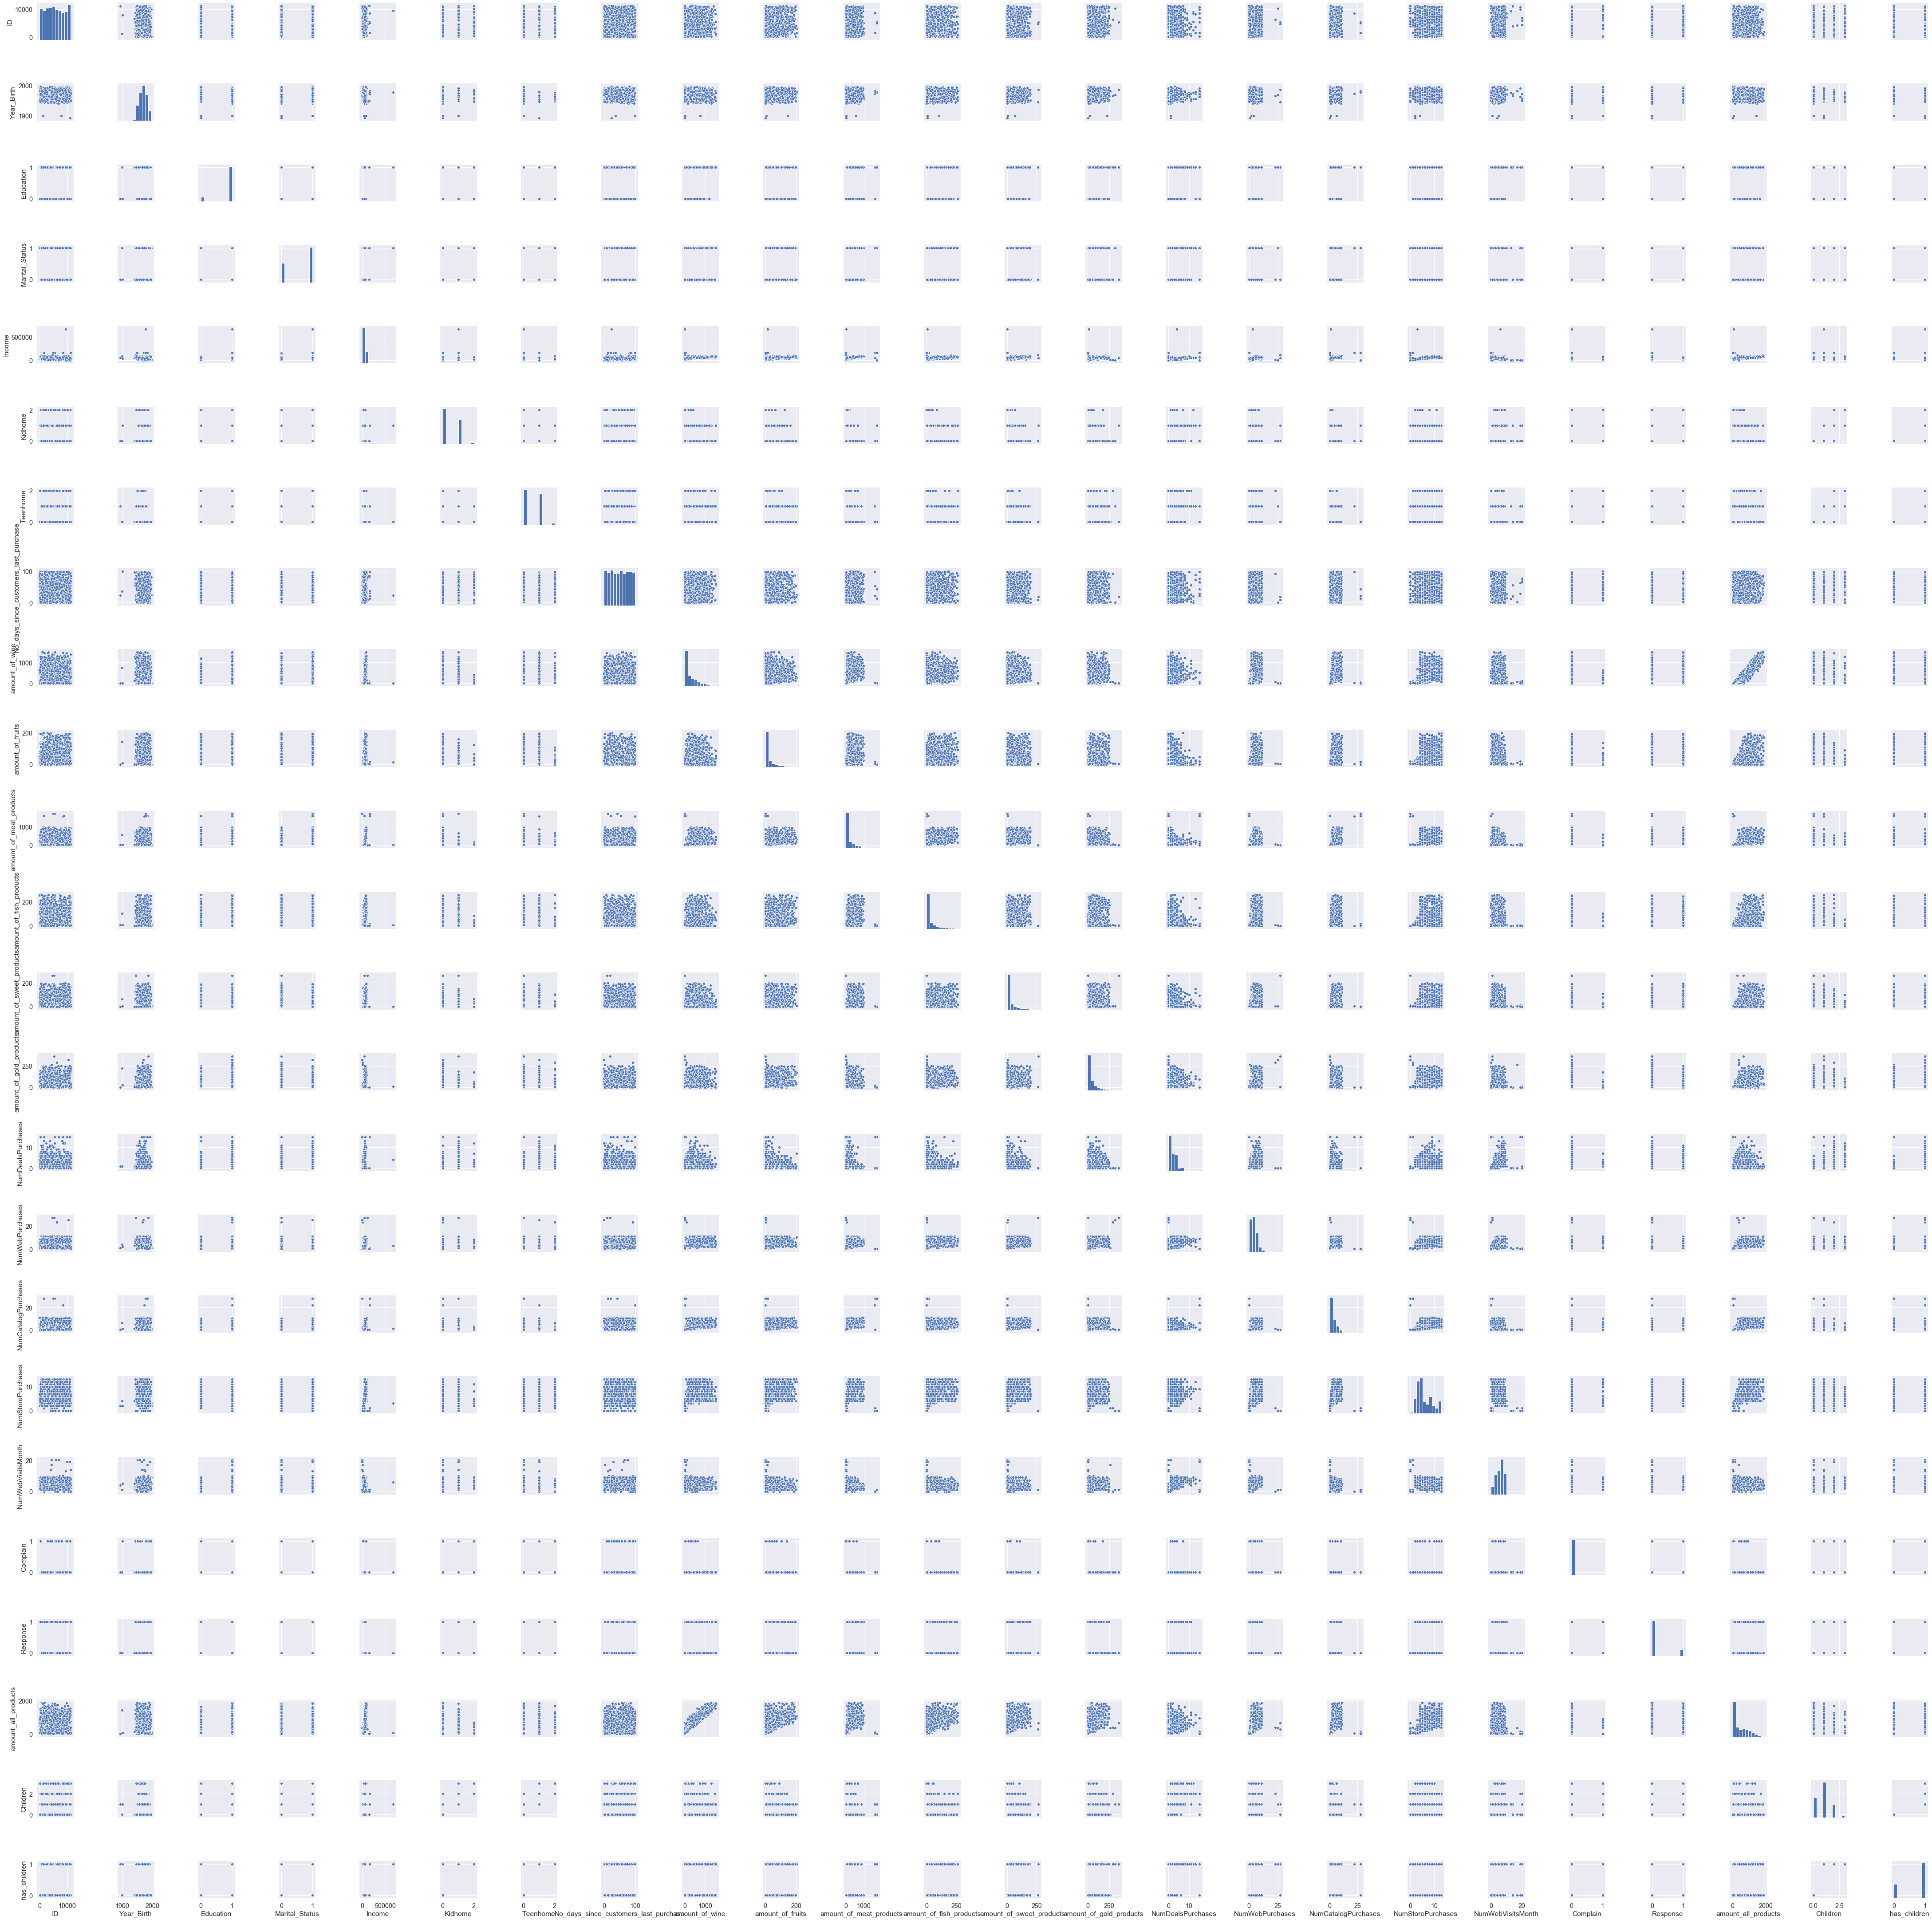

In [47]:
sns.pairplot(df)

In [224]:
c={'Income':df['Income'],'Marital_Status':df['Marital_Status'],'Year_Birth':df['Year_Birth'],
   'Education':df['Education'],'amount_all_products':df['amount_all_products'],'Children':df['Children']}
df__=pd.DataFrame(c)

In [225]:
df__

,Income,Marital_Status,Year_Birth,Education,amount_all_products,Children
0,58138.0,0,1957,1,1159,0
1,46344.0,0,1954,1,22,2
2,71613.0,1,1965,1,698,0
3,26646.0,1,1984,1,37,1
4,58293.0,1,1981,1,347,1
...,...,...,...,...,...,...
2235,61223.0,1,1967,1,1202,1
2236,64014.0,1,1946,1,414,3
2237,56981.0,0,1981,1,1072,0
2238,69245.0,1,1956,1,659,1


In [226]:
correl=df__.corr()

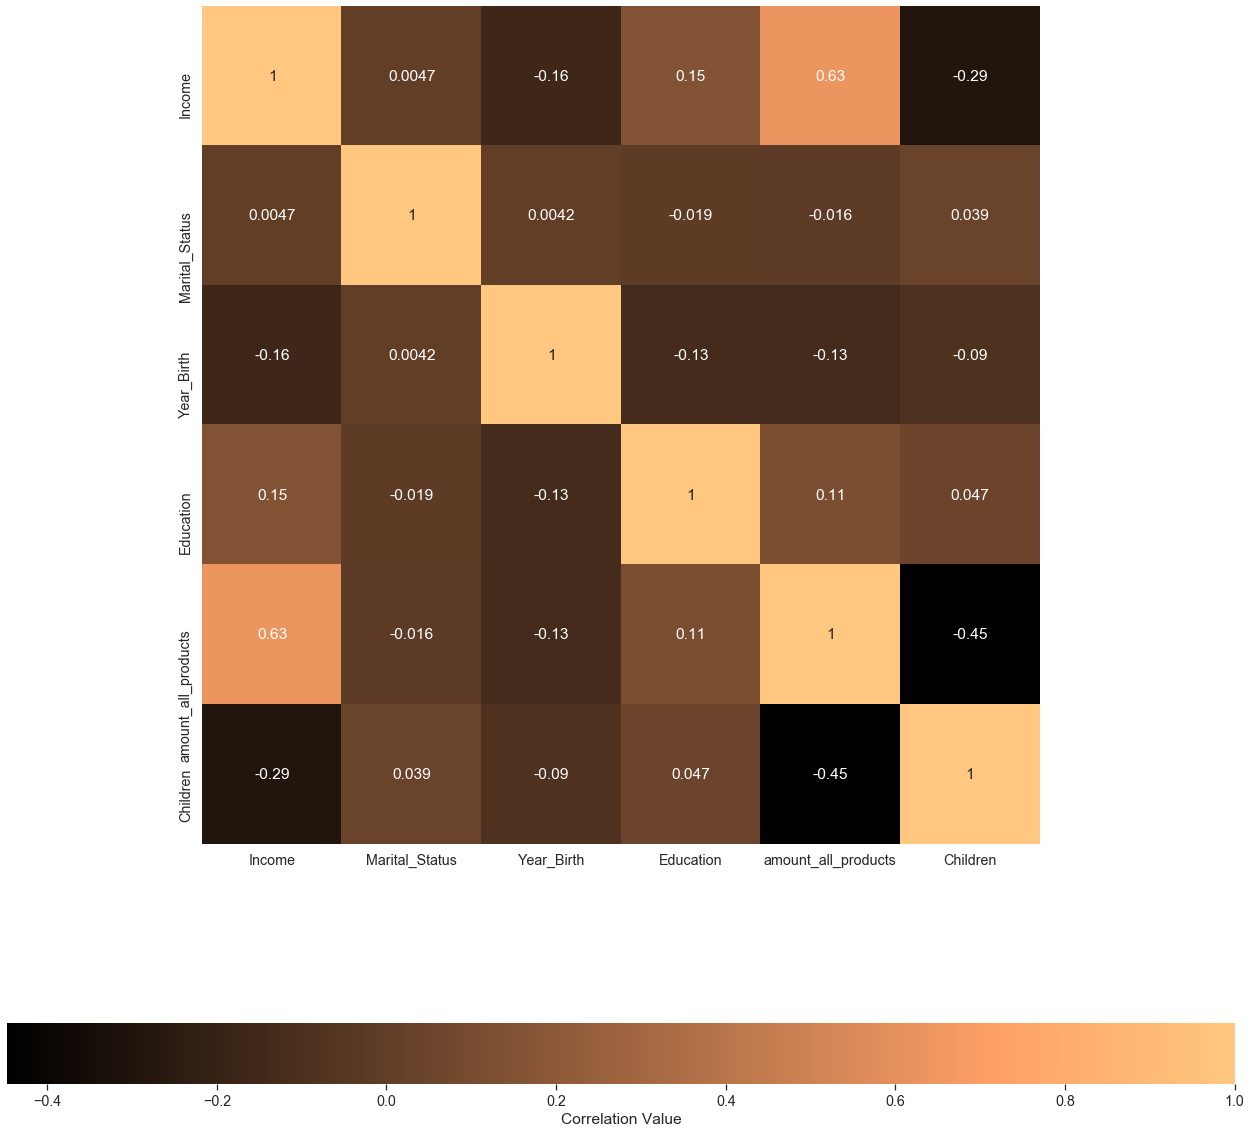

In [227]:
plt.subplots(figsize = (22, 22))
sns.heatmap(correl,cmap = "copper",annot = True, square = True, cbar_kws = {'label': 'Correlation Value', 'orientation': 'horizontal'});

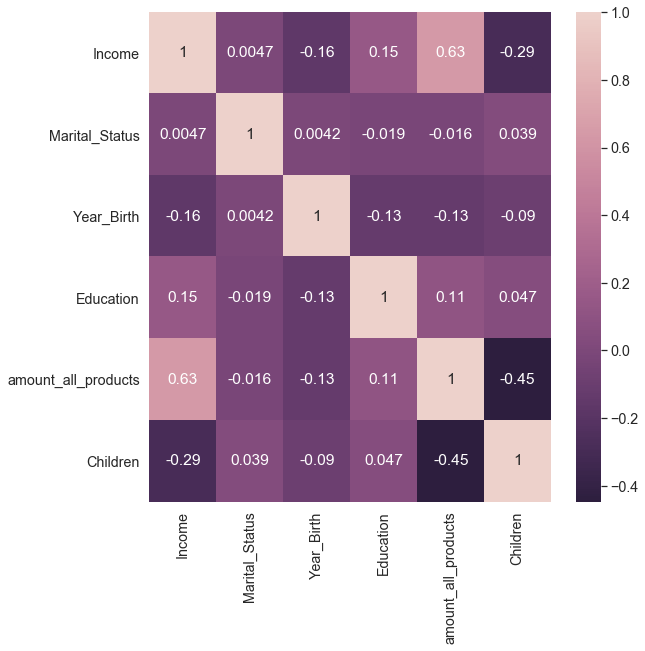

In [228]:
cmap=sns.cubehelix_palette(reverse=True,as_cmap=True)
sns.heatmap(correl,annot=True,cmap=cmap)

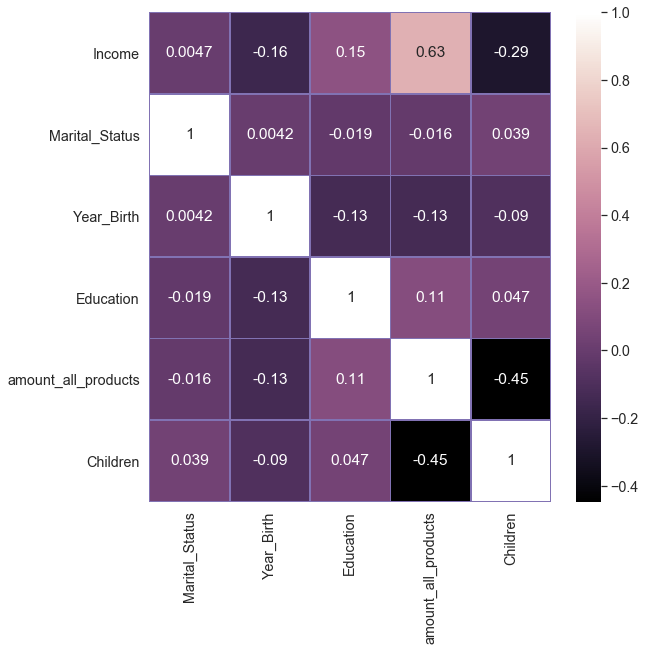

In [229]:
cmap=sns.cubehelix_palette(dark=0,light=1,reverse=True,as_cmap=True)
sns.heatmap(correl.iloc[:, 1:6:], annot=True,cmap=cmap,linecolor='m',linewidths=.5)

In [230]:
#sns.pairplot(df__)

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   ID                                     2240 non-null   int64         
 1   Year_Birth                             2240 non-null   int64         
 2   Education                              2240 non-null   int64         
 3   Marital_Status                         2240 non-null   int64         
 4   Income                                 2240 non-null   float64       
 5   Kidhome                                2240 non-null   int64         
 6   Teenhome                               2240 non-null   int64         
 7   Date_of_enrollment_with_company        2240 non-null   datetime64[ns]
 8   No_days_since_customers_last_purchase  2240 non-null   int64         
 9   amount_of_wine                         2240 non-null   int64   

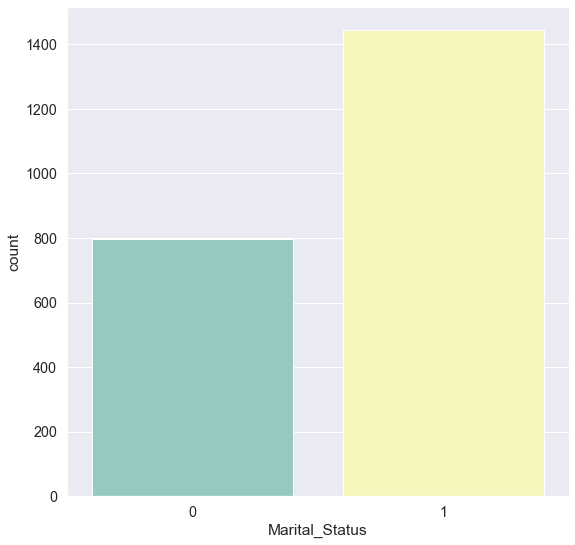

In [232]:
sns.countplot(x='Marital_Status',data=df,palette="Set3")

In [233]:
(df['Income']<1000000)

0       True
1       True
2       True
3       True
4       True
        ... 
2235    True
2236    True
2237    True
2238    True
2239    True
Name: Income, Length: 2240, dtype: bool

In [234]:
mid=df['Income'].median()
print(mid)

51381.5


In [235]:
minimum=df['Income'].min()
minimum

1730.0

In [236]:
df['Income'].max()

666666.0

In [237]:
df['Income'].describe()

count      2240.000000
mean      52237.975446
std       25037.955891
min        1730.000000
25%       35538.750000
50%       51381.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64

In [308]:
def classif(x):
    if x<40000:
        return 0
    elif x<100000 and x>40000:
        return 1
    elif x<666666 and x>100000:
        return 2

In [309]:
#new column
df['new_income']=df['Income'].apply(classif)

In [321]:
df['new_income'].unique()

array([1, 0, 2], dtype=int64)

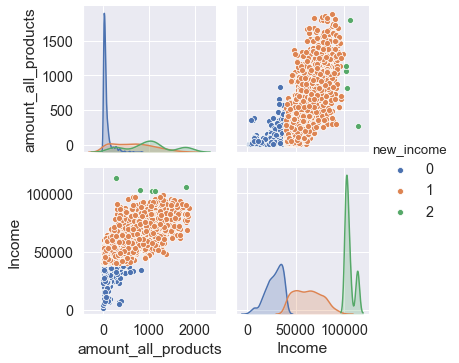

In [323]:
#relation between amount of all products and income,new income
sns.pairplot(df,vars=['amount_all_products','Income'],hue='new_income')

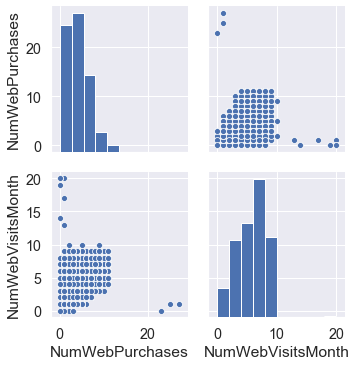

In [324]:
#relation between NumWebPurchases and NumWebVisitsMonth
sns.pairplot(df,vars=['NumWebPurchases','NumWebVisitsMonth'])

In [325]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   ID                                     2229 non-null   int64         
 1   Year_Birth                             2229 non-null   int64         
 2   Education                              2229 non-null   int64         
 3   Marital_Status                         2229 non-null   int64         
 4   Income                                 2229 non-null   float64       
 5   Kidhome                                2229 non-null   int64         
 6   Teenhome                               2229 non-null   int64         
 7   Date_of_enrollment_with_company        2229 non-null   datetime64[ns]
 8   No_days_since_customers_last_purchase  2229 non-null   int64         
 9   amount_of_wine                         2229 non-null   int64   

(array([ 731.,    0.,    0., 1493.,    0.,    0.,    5.,    0.,    0.,
           0.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

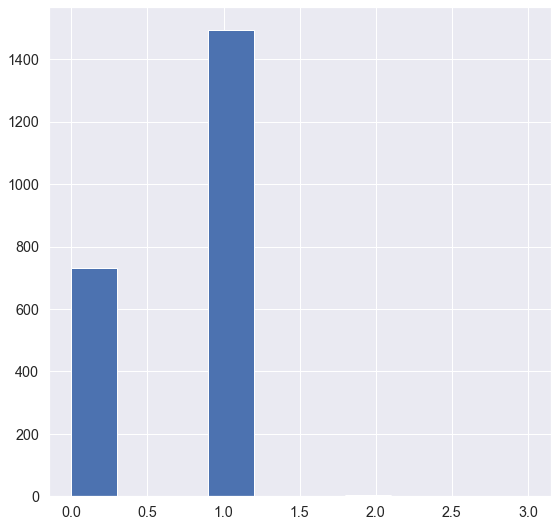

In [328]:
plt.hist(df['new_income'],range=[0,3])

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   ID                                     2240 non-null   int64         
 1   Year_Birth                             2240 non-null   int64         
 2   Education                              2240 non-null   int64         
 3   Marital_Status                         2240 non-null   int64         
 4   Income                                 2240 non-null   float64       
 5   Kidhome                                2240 non-null   int64         
 6   Teenhome                               2240 non-null   int64         
 7   Date_of_enrollment_with_company        2240 non-null   datetime64[ns]
 8   No_days_since_customers_last_purchase  2240 non-null   int64         
 9   amount_of_wine                         2240 non-null   int64   

In [128]:
#sns.countplot(x='new_income',y='Marital_Status',data=df)

In [129]:
flights=df.pivot_table(index='Marital_Status',columns='Children',values='amount_all_products')
flights

Children,0,1,2,3
Marital_Status,,,,
0,787.318898,388.650000,189.836879,170.333333
1,784.757812,395.899733,208.917857,248.437500


In [130]:
#cmap=sns.cubehelix_palette(dark=0,light=1,reverse=True,as_cmap=True)
#sns.heatmap(flights,cmap="YlGnBu",linewidths=3)

In [131]:
#cmap=sns.cubehelix_palette(dark=0,light=1,reverse=True,as_cmap=True)
#sns.heatmap(flights.corr(),cmap="YlGnBu",annot=True,linecolor='m',linewidths=4)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   ID                                     2240 non-null   int64         
 1   Year_Birth                             2240 non-null   int64         
 2   Education                              2240 non-null   int64         
 3   Marital_Status                         2240 non-null   int64         
 4   Income                                 2240 non-null   float64       
 5   Kidhome                                2240 non-null   int64         
 6   Teenhome                               2240 non-null   int64         
 7   Date_of_enrollment_with_company        2240 non-null   datetime64[ns]
 8   No_days_since_customers_last_purchase  2240 non-null   int64         
 9   amount_of_wine                         2240 non-null   int64   

In [251]:
data=df[['Income','amount_all_products']]
data

,Income,amount_all_products
0,58138.0,1159
1,46344.0,22
2,71613.0,698
3,26646.0,37
4,58293.0,347
...,...,...
2235,61223.0,1202
2236,64014.0,414
2237,56981.0,1072
2238,69245.0,659


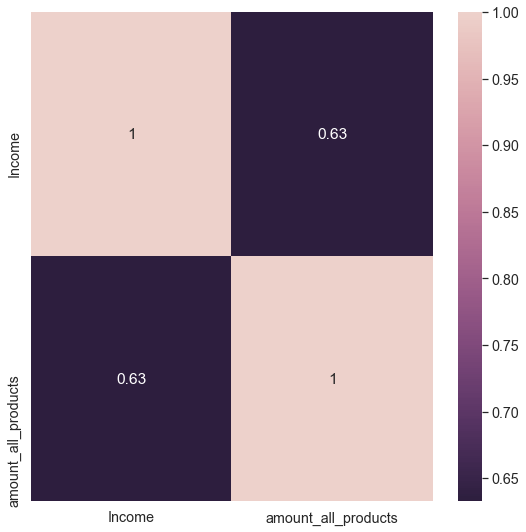

In [253]:
cmap=sns.cubehelix_palette(reverse=True,as_cmap=True)
sns.heatmap(data.corr(),annot=True,cmap=cmap)

In [254]:
#amount of meat_products corresponding to its income
#flights=df.pivot_table(index='Year_Birth',columns='no_of_children_incustomers_house',values='Income')
#flights

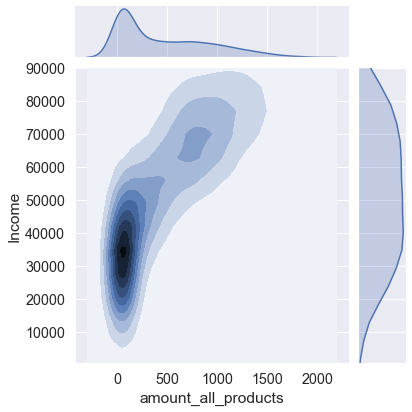

In [329]:
sns.jointplot(x='amount_all_products',y='Income',kind='kde',data=data,ylim=(500,90000))

# Feature_extraction

In [256]:
#adding some columns
df['year_of_entrolllment']=df['Date_of_enrollment_with_company'].dt.year
df['month_of_entrolllment']=df['Date_of_enrollment_with_company'].dt.month
df['day_of_entrollment']=df['Date_of_enrollment_with_company'].dt.day
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Date_of_enrollment_with_company,No_days_since_customers_last_purchase,amount_of_wine,...,NumWebVisitsMonth,Complain,Response,amount_all_products,Children,has_children,new_income,year_of_entrolllment,month_of_entrolllment,day_of_entrollment
0,5524,1957,1,0,58138.0,0,0,2012-04-09,58,635,...,7,0,1,1159,0,0,2.0,2012,4,9
1,2174,1954,1,0,46344.0,1,1,2014-08-03,38,11,...,5,0,0,22,2,1,1.0,2014,8,3
2,4141,1965,1,1,71613.0,0,0,2013-08-21,26,426,...,4,0,0,698,0,0,1.0,2013,8,21
3,6182,1984,1,1,26646.0,1,0,2014-10-02,26,11,...,6,0,0,37,1,1,0.0,2014,10,2
4,5324,1981,1,1,58293.0,1,0,2014-01-19,94,173,...,5,0,0,347,1,1,2.0,2014,1,19


In [257]:
#adding new feature
df['years_spent_with_thecompany']=(datetime(2021,11,26)-df['Date_of_enrollment_with_company'])/np.timedelta64(1,'Y')#M,D,W,h,m

In [258]:
#adding new feature
df['age_of_customer']=(2021-df['Year_Birth'])

In [259]:
#df['Spending']=df['amount_of_wine']+df['amount_of_fruits']+df['amount_of_meat_products']+df['amount_of_fish_products']+df['amount_of_sweet_products']+df['amount_of_gold_products']
#df

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   ID                                     2240 non-null   int64         
 1   Year_Birth                             2240 non-null   int64         
 2   Education                              2240 non-null   int64         
 3   Marital_Status                         2240 non-null   int64         
 4   Income                                 2240 non-null   float64       
 5   Kidhome                                2240 non-null   int64         
 6   Teenhome                               2240 non-null   int64         
 7   Date_of_enrollment_with_company        2240 non-null   datetime64[ns]
 8   No_days_since_customers_last_purchase  2240 non-null   int64         
 9   amount_of_wine                         2240 non-null   int64   

In [261]:
df.describe()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,No_days_since_customers_last_purchase,amount_of_wine,amount_of_fruits,...,Response,amount_all_products,Children,has_children,new_income,year_of_entrolllment,month_of_entrolllment,day_of_entrollment,years_spent_with_thecompany,age_of_customer
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.885268,0.644643,52237.975446,0.444196,0.506250,49.109375,303.935714,26.302232,...,0.149107,465.150446,0.950446,0.715179,1.005357,2013.028125,6.520089,15.585714,8.375376,52.194196
std,3246.662198,11.984069,0.318770,0.478728,25037.955891,0.538398,0.544538,28.962453,336.597393,39.773434,...,0.356274,453.572523,0.751803,0.451430,0.711023,0.684554,3.512696,8.834884,0.635824,11.984069
min,0.000000,1893.000000,0.000000,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,5.000000,0.000000,0.000000,0.000000,2012.000000,1.000000,1.000000,6.973449,25.000000
25%,2828.250000,1959.000000,1.000000,0.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,...,0.000000,56.000000,0.000000,0.000000,0.750000,2013.000000,3.000000,8.000000,7.906391,44.000000
50%,5458.500000,1970.000000,1.000000,1.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,...,0.000000,311.000000,1.000000,1.000000,1.000000,2013.000000,6.000000,16.000000,8.377995,51.000000
75%,8427.750000,1977.000000,1.000000,1.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,...,0.000000,797.000000,1.000000,1.000000,2.000000,2013.000000,10.000000,23.000000,8.849600,62.000000
max,11191.000000,1996.000000,1.000000,1.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,...,1.000000,1881.000000,3.000000,1.000000,2.000000,2014.000000,12.000000,31.000000,9.883844,128.000000


In [262]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Date_of_enrollment_with_company,No_days_since_customers_last_purchase,amount_of_wine,...,Response,amount_all_products,Children,has_children,new_income,year_of_entrolllment,month_of_entrolllment,day_of_entrollment,years_spent_with_thecompany,age_of_customer
0,5524,1957,1,0,58138.0,0,0,2012-04-09,58,635,...,1,1159,0,0,2.0,2012,4,9,9.631957,64
1,2174,1954,1,0,46344.0,1,1,2014-08-03,38,11,...,0,22,2,1,1.0,2014,8,3,7.315688,67
2,4141,1965,1,1,71613.0,0,0,2013-08-21,26,426,...,0,698,0,0,1.0,2013,8,21,8.265741,56
3,6182,1984,1,1,26646.0,1,0,2014-10-02,26,11,...,0,37,1,1,0.0,2014,10,2,7.151413,37
4,5324,1981,1,1,58293.0,1,0,2014-01-19,94,173,...,0,347,1,1,2.0,2014,1,19,7.852317,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,1,1,61223.0,0,1,2013-06-13,46,709,...,0,1202,1,1,2.0,2013,6,13,8.454657,54
2236,4001,1946,1,1,64014.0,2,1,2014-10-06,56,406,...,0,414,3,1,2.0,2014,10,6,7.140461,75
2237,7270,1981,1,0,56981.0,0,0,2014-01-25,91,908,...,0,1072,0,0,2.0,2014,1,25,7.835890,40
2238,8235,1956,1,1,69245.0,0,1,2014-01-24,8,428,...,0,659,1,1,1.0,2014,1,24,7.838628,65


# detect the ourtliers

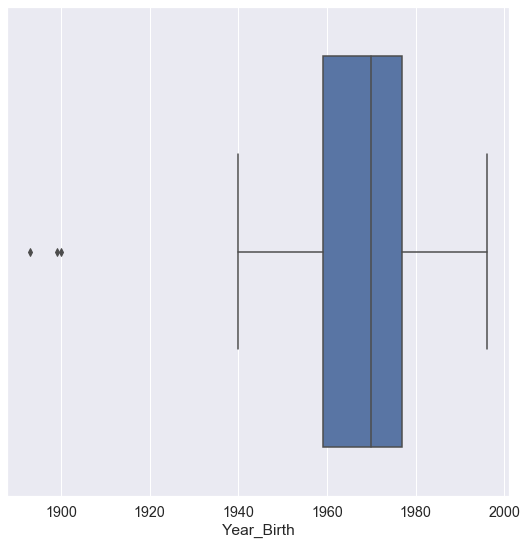

In [263]:
sns.boxplot(df['Year_Birth'])

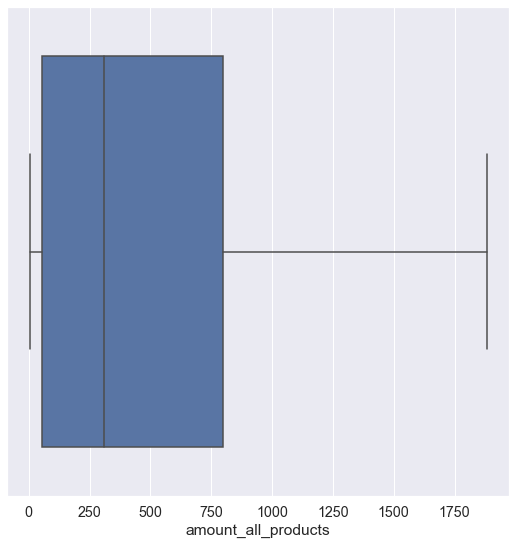

In [264]:
sns.boxplot(df['amount_all_products'])

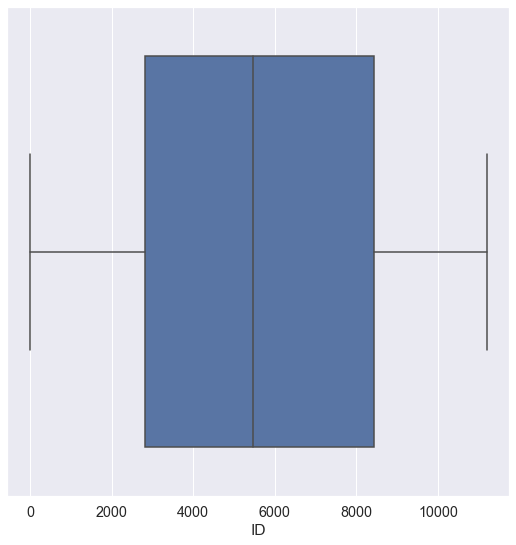

In [265]:
sns.boxplot(df['ID'])

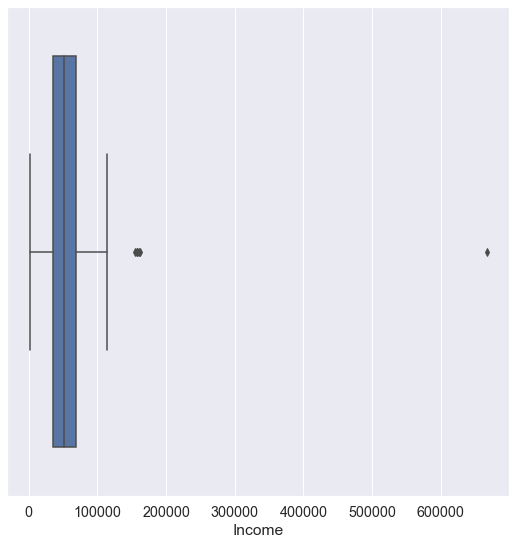

In [272]:
sns.boxplot(df['Income'])

In [266]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Date_of_enrollment_with_company',
       'No_days_since_customers_last_purchase', 'amount_of_wine',
       'amount_of_fruits', 'amount_of_meat_products',
       'amount_of_fish_products', 'amount_of_sweet_products',
       'amount_of_gold_products', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response', 'amount_all_products', 'Children',
       'has_children', 'new_income', 'year_of_entrolllment',
       'month_of_entrolllment', 'day_of_entrollment',
       'years_spent_with_thecompany', 'age_of_customer'],
      dtype='object')

In [267]:
data_2=df[['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome','No_days_since_customers_last_purchase', 'amount_of_wine',
       'amount_of_fruits', 'amount_of_meat_products',
       'amount_of_fish_products', 'amount_of_sweet_products',
       'amount_of_gold_products', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response', 'amount_all_products', 'Children',
       'has_children', 'new_income', 'year_of_entrolllment',
       'month_of_entrolllment', 'day_of_entrollment',
       'years_spent_with_thecompany', 'age_of_customer']]
data_2

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,No_days_since_customers_last_purchase,amount_of_wine,amount_of_fruits,...,Response,amount_all_products,Children,has_children,new_income,year_of_entrolllment,month_of_entrolllment,day_of_entrollment,years_spent_with_thecompany,age_of_customer
0,5524,1957,1,0,58138.0,0,0,58,635,88,...,1,1159,0,0,2.0,2012,4,9,9.631957,64
1,2174,1954,1,0,46344.0,1,1,38,11,1,...,0,22,2,1,1.0,2014,8,3,7.315688,67
2,4141,1965,1,1,71613.0,0,0,26,426,49,...,0,698,0,0,1.0,2013,8,21,8.265741,56
3,6182,1984,1,1,26646.0,1,0,26,11,4,...,0,37,1,1,0.0,2014,10,2,7.151413,37
4,5324,1981,1,1,58293.0,1,0,94,173,43,...,0,347,1,1,2.0,2014,1,19,7.852317,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,1,1,61223.0,0,1,46,709,43,...,0,1202,1,1,2.0,2013,6,13,8.454657,54
2236,4001,1946,1,1,64014.0,2,1,56,406,0,...,0,414,3,1,2.0,2014,10,6,7.140461,75
2237,7270,1981,1,0,56981.0,0,0,91,908,48,...,0,1072,0,0,2.0,2014,1,25,7.835890,40
2238,8235,1956,1,1,69245.0,0,1,8,428,30,...,0,659,1,1,1.0,2014,1,24,7.838628,65


In [268]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Date_of_enrollment_with_company,No_days_since_customers_last_purchase,amount_of_wine,...,Response,amount_all_products,Children,has_children,new_income,year_of_entrolllment,month_of_entrolllment,day_of_entrollment,years_spent_with_thecompany,age_of_customer
0,5524,1957,1,0,58138.0,0,0,2012-04-09,58,635,...,1,1159,0,0,2.0,2012,4,9,9.631957,64
1,2174,1954,1,0,46344.0,1,1,2014-08-03,38,11,...,0,22,2,1,1.0,2014,8,3,7.315688,67
2,4141,1965,1,1,71613.0,0,0,2013-08-21,26,426,...,0,698,0,0,1.0,2013,8,21,8.265741,56
3,6182,1984,1,1,26646.0,1,0,2014-10-02,26,11,...,0,37,1,1,0.0,2014,10,2,7.151413,37
4,5324,1981,1,1,58293.0,1,0,2014-01-19,94,173,...,0,347,1,1,2.0,2014,1,19,7.852317,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,1,1,61223.0,0,1,2013-06-13,46,709,...,0,1202,1,1,2.0,2013,6,13,8.454657,54
2236,4001,1946,1,1,64014.0,2,1,2014-10-06,56,406,...,0,414,3,1,2.0,2014,10,6,7.140461,75
2237,7270,1981,1,0,56981.0,0,0,2014-01-25,91,908,...,0,1072,0,0,2.0,2014,1,25,7.835890,40
2238,8235,1956,1,1,69245.0,0,1,2014-01-24,8,428,...,0,659,1,1,1.0,2014,1,24,7.838628,65


In [273]:
indices=detect_outliers(df,0,df[['Year_Birth','Income']])
df.drop(indices,inplace=True)

In [280]:
df['Year_Birth'].unique()

array([1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983,
       1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969,
       1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977,
       1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962,
       1953, 1961, 1956, 1992, 1990, 1947, 1993, 1994, 1941, 1944, 1995,
       1940], dtype=int64)

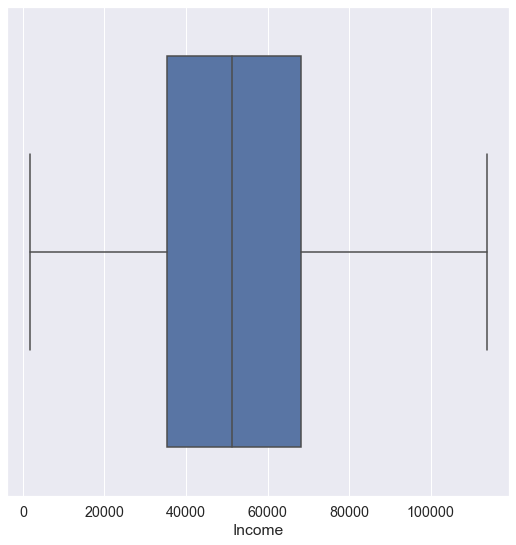

In [275]:
sns.boxplot(df['Income'])

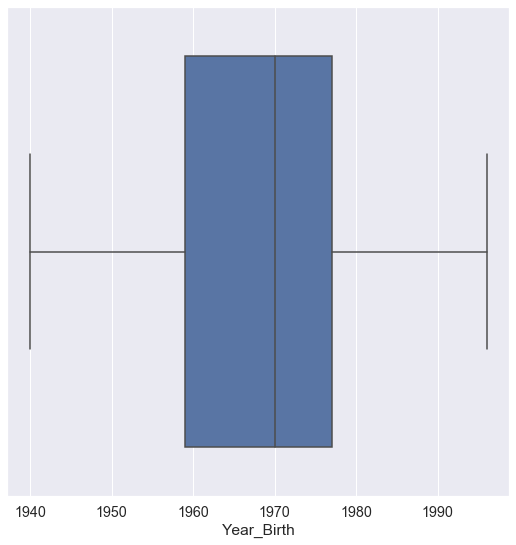

In [274]:
sns.boxplot(df['Year_Birth'])

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   ID                                     2229 non-null   int64         
 1   Year_Birth                             2229 non-null   int64         
 2   Education                              2229 non-null   int64         
 3   Marital_Status                         2229 non-null   int64         
 4   Income                                 2229 non-null   float64       
 5   Kidhome                                2229 non-null   int64         
 6   Teenhome                               2229 non-null   int64         
 7   Date_of_enrollment_with_company        2229 non-null   datetime64[ns]
 8   No_days_since_customers_last_purchase  2229 non-null   int64         
 9   amount_of_wine                         2229 non-null   int64   

In [285]:
f=df[['age_of_customer','amount_all_products']]
x=df[['age_of_customer','amount_of_wine']]

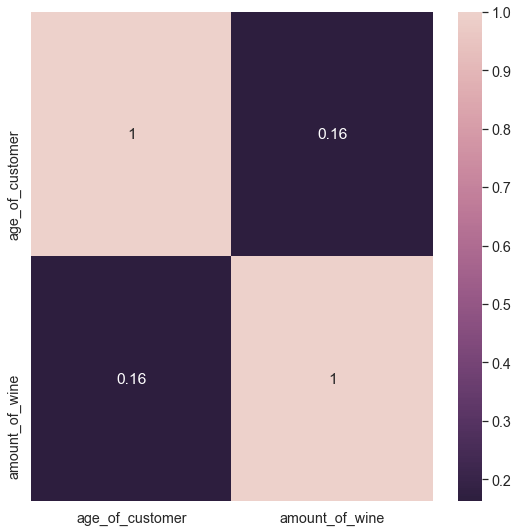

In [286]:
cmap=sns.cubehelix_palette(reverse=True,as_cmap=True)
sns.heatmap(x.corr(),annot=True,cmap=cmap)

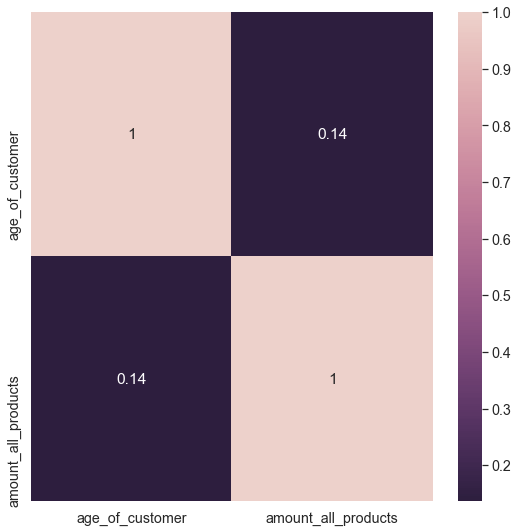

In [284]:
cmap=sns.cubehelix_palette(reverse=True,as_cmap=True)
sns.heatmap(f.corr(),annot=True,cmap=cmap)

# splitting data

In [ ]:
x=df.drop('ID',axis=1)
y=df['ID']

In [277]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45)

In [279]:
y_train.value_counts()

10299    1
3363     1
9478     1
7431     1
7433     1
        ..
10936    1
2021     1
8895     1
8897     1
4096     1
Name: ID, Length: 1783, dtype: int64

4094    1
6141    1
7433    1
5386    1
7437    1
       ..
2712    1
6810    1
4767    1
4769    1
4096    1
Name: ID, Length: 1792, dtype: int64